In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
import umap
import time
import warnings
# !pip install umap-learn

# Import Data: Electronic Sales (Sep 2023 - Sep 2024)
Generated data from Kaggle.

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/scscodes/d8350db9e09cc6670bd85bcc799c1f72/raw/ba37ad2589bc50d6e90fca95981c479a76ff3874/electronic-sales.csv").dropna()

In [3]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,3/20/2024,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,4/20/2024,Overnight,Impulse Item,26.09
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,8/9/2024,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,5/21/2024,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,5/26/2024,Standard,"Impulse Item,Accessory",65.78


In [4]:
# Select numerical columns
numerical_cols = ['Age', 'Rating', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']

# Preprocess the data by filling missing values and scaling
df_preprocessed = df[numerical_cols].fillna(0)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_preprocessed)

# Apply Dimensionality

## ... with PCA

In [5]:
start_time = time.time()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_runtime = time.time() - start_time
print(f"PCA runtime: {pca_runtime:.2f} seconds")

PCA runtime: 0.03 seconds


## ... with t-SNE

In [6]:
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)
tsne_runtime = time.time() - start_time
print(f"t-SNE runtime: {tsne_runtime:.2f} seconds")

t-SNE runtime: 216.93 seconds


## ... with UMAP

In [7]:
start_time = time.time()
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df_scaled)
umap_runtime = time.time() - start_time
print(f"UMAP runtime: {umap_runtime:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP runtime: 41.05 seconds


## Dimensionality Results
As discussed in the lesson, PCA performed faster than t-SNE or UMAP, but (as seen later) the visualized output is not satisfactory in this case.

**UMAP** would be the best choice overall, as it performs well - significantly better than its t-SNE counterpart - but still has excellent results when visualized using KMeans and DBSCAN clustering methods.

# Clustering with KMeans, `n_clusters` visualizations

## ... with t-SNE

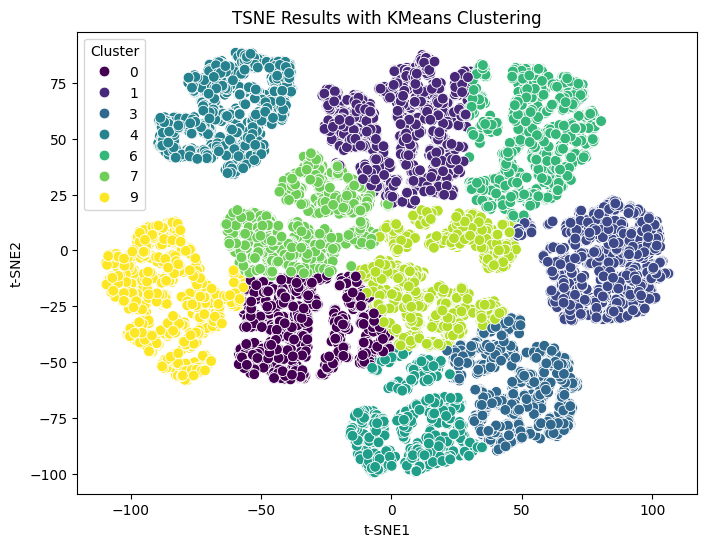

In [31]:
# Initialize KMeans, setting # of clusters and creating cluster labels
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_result)

# plot tsne_result with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title('TSNE Results with KMeans Clustering')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Cluster')
plt.show()

## ... with UMAP

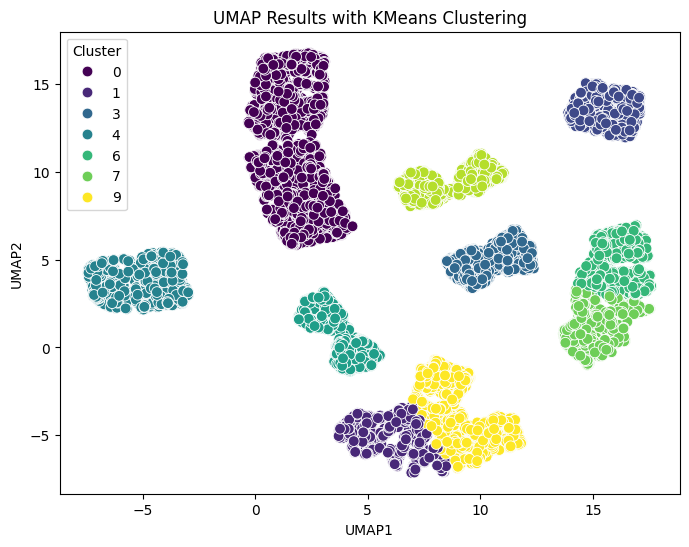

In [30]:
# Initialize KMeans, setting # of clusters and creating cluster labels
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_result)

# plot the UMAP results with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title('UMAP Results with KMeans Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')
plt.show()

## Consolidate Results into a new DF

In [10]:
reduced_df = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'tSNE1': tsne_result[:, 0],
    'tSNE2': tsne_result[:, 1],
    'UMAP1': umap_result[:, 0],
    'UMAP2': umap_result[:, 1]
})
reduced_df.head()

,PCA1,PCA2,tSNE1,tSNE2,UMAP1,UMAP2
0,1.321591,0.135269,45.903305,-71.751648,9.209267,-6.228377
1,-1.694812,-0.076705,-93.151039,-32.770981,0.819939,13.352439
2,0.362085,-0.917063,16.148741,-82.342857,6.362688,-6.083461
3,-2.891197,0.662162,-55.628319,39.070187,-3.678899,5.321149
4,-2.507972,0.915311,-67.585381,58.881271,-4.483882,3.448582


<ipython-input-15-7c4d88c5be77>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=reduced_df, ax=ax[0], palette='viridis')
<ipython-input-15-7c4d88c5be77>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tSNE1', y='tSNE2', data=reduced_df, ax=ax[1], palette='viridis')
<ipython-input-15-7c4d88c5be77>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UMAP1', y='UMAP2', data=reduced_df, ax=ax[2], palette='viridis')


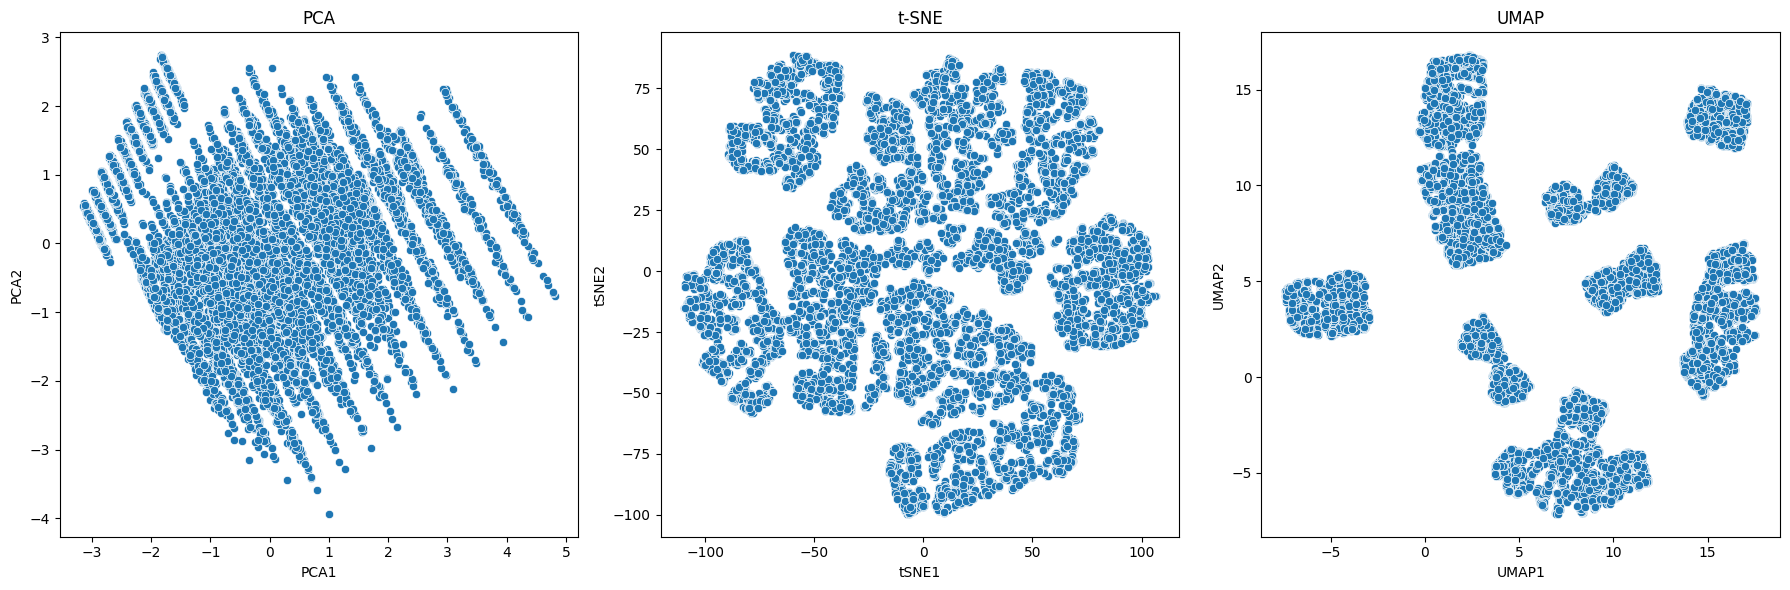

In [15]:
# organize plotting structure for the three approaches
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(x='PCA1', y='PCA2', data=reduced_df, ax=ax[0], palette='viridis')
ax[0].set_title('PCA')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('PCA2')

# t-SNE plot
sns.scatterplot(x='tSNE1', y='tSNE2', data=reduced_df, ax=ax[1], palette='viridis')
ax[1].set_title('t-SNE')
ax[1].set_xlabel('tSNE1')
ax[1].set_ylabel('tSNE2')

# UMAP plot
sns.scatterplot(x='UMAP1', y='UMAP2', data=reduced_df, ax=ax[2], palette='viridis')
ax[2].set_title('UMAP')
ax[2].set_xlabel('UMAP1')
ax[2].set_ylabel('UMAP2')

plt.tight_layout()
plt.show()


# Clustering with DBSCAN, `min_samples` visualizations

## ... with t-SNE

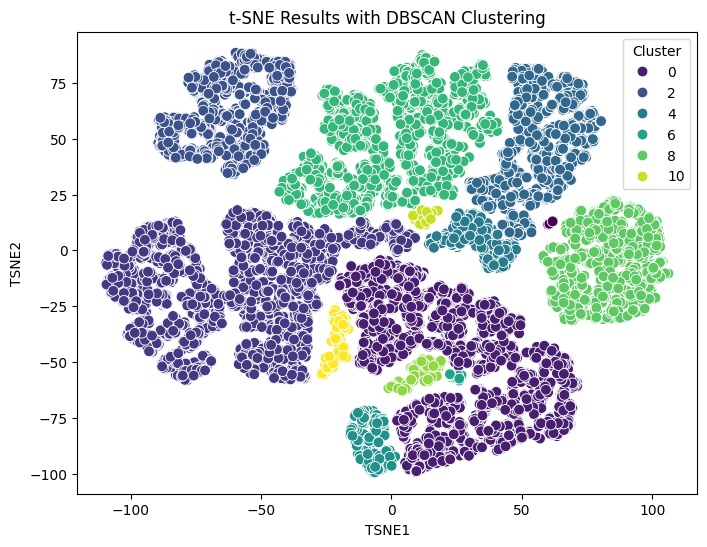

In [54]:
dbscan = DBSCAN(eps=4, min_samples=8)
cluster_labels = dbscan.fit_predict(tsne_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title('t-SNE Results with DBSCAN Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.show()

## ... with UMAP

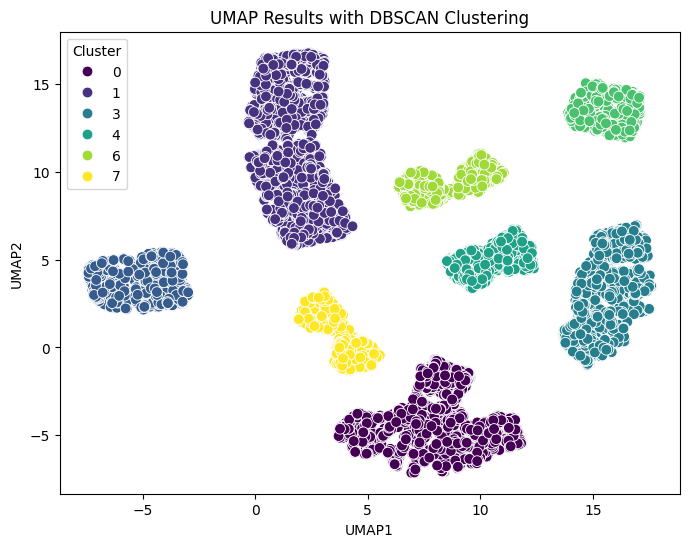

In [53]:
dbscan = DBSCAN(eps=1, min_samples=5)
cluster_labels = dbscan.fit_predict(umap_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title('UMAP Results with DBSCAN Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')
plt.show()

# Summary

The data set used in this challenge is related to customer orders. With a substantial number of features, discovering underlying trends can be extremely difficult without the likes of UMAP (or t-SNE) with KMmeans/DBSCAN clustering. When applied to this type of complex data set, it offers new perspective on the customer base, which may not be explicitly defined in features.

For example, it can help detect groups of customers, highlighting purchase behavior or other demographic patterns that can help deliver marketing and tailored experiences for better rentiontion.

It can also highlight relationships between data, such as similar purchasing trends, items bought together, or even provide density (with DBSCAN), offering a means to exclude noise or outliers in data that may have skewed other metrics/analytics.